In [19]:
!pip install gymnasium[classic_control]


Setup and Environment Initialization

In [20]:
import gymnasium as gym
import numpy as np
import random
from collections import defaultdict
import matplotlib.pyplot as plt

env = gym.make("CartPole-v1")

# Discretize state
def discretize_state(state, bins):
    upper_bounds = [env.observation_space.high[0], 0.5, env.observation_space.high[2], np.radians(50)]
    lower_bounds = [env.observation_space.low[0], -0.5, env.observation_space.low[2], -np.radians(50)]
    ratios = [(state[i] + abs(lower_bounds[i])) / (upper_bounds[i] - lower_bounds[i]) for i in range(len(state))]
    new_state = [int(round((bins[i] - 1) * ratios[i])) for i in range(len(state))]
    new_state = [min(bins[i] - 1, max(0, new_state[i])) for i in range(len(state))]
    return tuple(new_state)

# Epsilon-greedy
def epsilon_greedy(q_table, state, epsilon, n_actions):
    return random.randint(0, n_actions - 1) if random.random() < epsilon else np.argmax(q_table[state])

Q-Learning Algorithm for CartPole

In [21]:
def q_learning_cartpole(episodes=5000, alpha=0.1, gamma=0.99, epsilon=0.1):
    bins = [6, 12, 6, 12]
    q_table = defaultdict(lambda: np.zeros(env.action_space.n))
    rewards = []

    for _ in range(episodes):
        obs, _ = env.reset()
        state = discretize_state(obs, bins)
        total_reward = 0
        done = False

        while not done:
            action = epsilon_greedy(q_table, state, epsilon, env.action_space.n)
            next_obs, reward, terminated, truncated, _ = env.step(action)
            next_state = discretize_state(next_obs, bins)
            q_table[state][action] += alpha * (reward + gamma * np.max(q_table[next_state]) - q_table[state][action])
            state = next_state
            total_reward += reward
            done = terminated or truncated

        rewards.append(total_reward)
    return q_table, rewards


SARSA Algorithm for CartPole

In [22]:
def sarsa_cartpole(episodes=5000, alpha=0.1, gamma=0.99, epsilon=0.1):
    bins = [6, 12, 6, 12]
    q_table = defaultdict(lambda: np.zeros(env.action_space.n))
    rewards = []

    for _ in range(episodes):
        obs, _ = env.reset()
        state = discretize_state(obs, bins)
        action = epsilon_greedy(q_table, state, epsilon, env.action_space.n)
        total_reward = 0
        done = False

        while not done:
            next_obs, reward, terminated, truncated, _ = env.step(action)
            next_state = discretize_state(next_obs, bins)
            next_action = epsilon_greedy(q_table, next_state, epsilon, env.action_space.n)
            q_table[state][action] += alpha * (reward + gamma * q_table[next_state][next_action] - q_table[state][action])
            state = next_state
            action = next_action
            total_reward += reward
            done = terminated or truncated

        rewards.append(total_reward)
    return q_table, rewards

Train and Plot Learning Curves

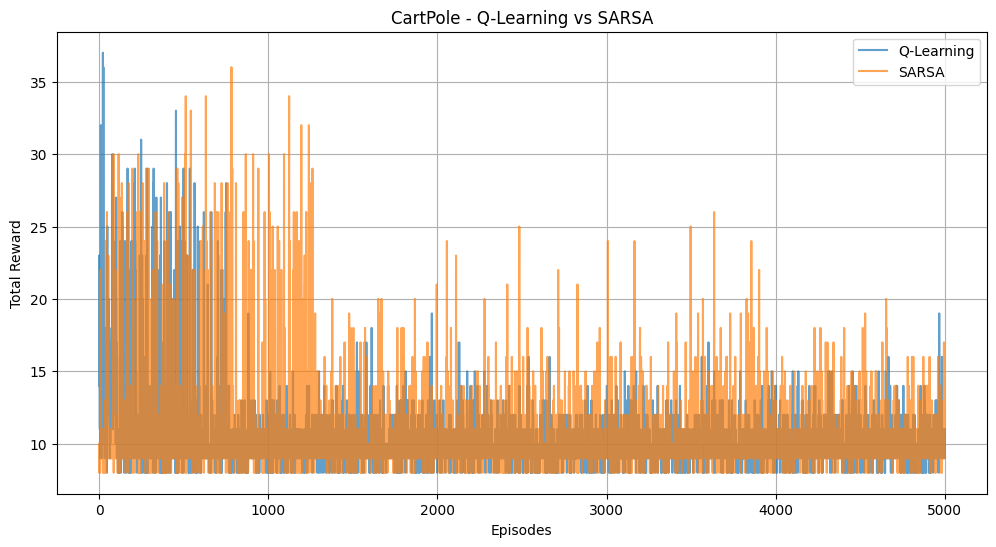

In [23]:
# Train and plot
episodes = 5000
q_table_q, rewards_q = q_learning_cartpole(episodes)
q_table_sarsa, rewards_sarsa = sarsa_cartpole(episodes)

plt.figure(figsize=(12, 6))
plt.plot(rewards_q, label='Q-Learning', alpha=0.7)
plt.plot(rewards_sarsa, label='SARSA', alpha=0.7)
plt.xlabel("Episodes")
plt.ylabel("Total Reward")
plt.title("CartPole - Q-Learning vs SARSA")
plt.legend()
plt.grid(True)
plt.show()